## Assignment - Advanced Regression

### 1. Data Understanding and Exploration

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [158]:
# reading the dataset
dataset = pd.read_csv("train.csv")
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [159]:
# summary of the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [160]:
# checking the null values
dataset.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [161]:
# shape of dataset
dataset.shape


(1460, 81)

 Note:Columns having NA values here signifies not having

In [162]:
# checking the null values percentages
dataset_null=pd.DataFrame((dataset.isnull().sum()/len(dataset)*100))
dataset_null.sort_values(by=0,ascending=False)

0
PoolQC        99.520548
MiscFeature   96.301370
Alley         93.767123
Fence         80.753425
FireplaceQu   47.260274
LotFrontage   17.739726
GarageYrBlt    5.547945
GarageCond     5.547945
GarageType     5.547945
GarageFinish   5.547945
GarageQual     5.547945
BsmtFinType2   2.602740
BsmtExposure   2.602740
BsmtQual       2.534247
BsmtCond       2.534247
BsmtFinType1   2.534247
MasVnrArea     0.547945
MasVnrType     0.547945
Electrical     0.068493
Id             0.000000
Functional     0.000000
Fireplaces     0.000000
KitchenQual    0.000000
KitchenAbvGr   0.000000
BedroomAbvGr   0.000000
HalfBath       0.000000
FullBath       0.000000
BsmtHalfBath   0.000000
TotRmsAbvGrd   0.000000
GarageCars     0.000000
...                 ...
Condition2     0.000000
Condition1     0.000000
Neighborhood   0.000000
LotConfig      0.000000
YearBuilt      0.000000
Utilities      0.000000
LandContour    0.000000
LotShape       0.000000
Street         0.000000
LotArea        0.000000
MSZoning       0.000000
OverallCond    0.000000
YearRemodAdd   0.000000
2ndFlrSF       0.000000
BsmtFinSF2     0.000000
1stFlrSF       0.000000
CentralAir     0.000000
MSSubClass     0.000000
Heating        0.000000
TotalBsmtSF    0.000000
BsmtUnfSF      0.000000
BsmtFinSF1     0.000000
RoofStyle      0.000000
Foundation     0.000000
ExterCond      0.000000
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000

[81 rows x 1 columns]

In [163]:
# treating columns having very less NA values
dataset = dataset[pd.notnull(dataset['Electrical'])]
dataset = dataset[pd.notnull(dataset['MasVnrArea'])]
dataset = dataset[pd.notnull(dataset['MasVnrType'])]
dataset = dataset[pd.notnull(dataset['GarageYrBlt'])]
dataset['GarageYrBlt']=dataset['GarageYrBlt'].astype('int64')
dataset['ageofgarage']=dataset['YrSold']-dataset['GarageYrBlt']
dataset['ageofhouse']=dataset['YrSold']-dataset['YearBuilt']
dataset['ageofhouseafterrepair']=dataset['YrSold']-dataset['YearRemodAdd']
dataset=dataset.drop(['YrSold','GarageYrBlt','YearRemodAdd','YearBuilt','PoolQC','MiscFeature','Alley'],axis=1)
dataset.shape

(1370, 77)

As checked from the data dictionary NA means 'No present' i.e. the thing is either not  present or does not exist.<br>
Let's drop these columns due to the following two reasons:<br>
1) As seen from the null percentage, 99.52% ,96.3%,93.0%  corresponding to PoolQC,MiscFeature,Alley columns can be directly dropped.
So, let's drop this column as it does not seem to contain enough information. <br>
2) Secondly, keeping it would  extra columns as these are also categorical variable.

Taking about GarageYrBlt , YrSold,YearBuilt columns, i am using them to calculate the ageofgarage,ageofhouse and ageofhouseafterrepair and hence delecting the respecting columns

In [164]:
# NOTE:NA in columns here signifies "not present" or "none" and hence replacing them with notpresent
dataset=dataset.replace(np.nan, 'notpresent')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1459
Data columns (total 77 columns):
Id                       1370 non-null int64
MSSubClass               1370 non-null int64
MSZoning                 1370 non-null object
LotFrontage              1370 non-null object
LotArea                  1370 non-null int64
Street                   1370 non-null object
LotShape                 1370 non-null object
LandContour              1370 non-null object
Utilities                1370 non-null object
LotConfig                1370 non-null object
LandSlope                1370 non-null object
Neighborhood             1370 non-null object
Condition1               1370 non-null object
Condition2               1370 non-null object
BldgType                 1370 non-null object
HouseStyle               1370 non-null object
OverallQual              1370 non-null int64
OverallCond              1370 non-null int64
RoofStyle                1370 non-null object
RoofMatl                

#### Plotting Graphs

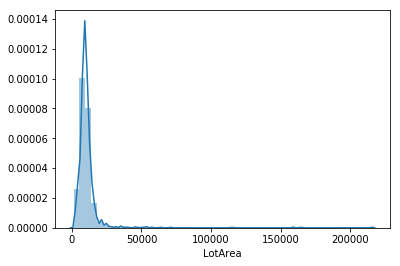

In [165]:
 # LotArea: Lot size in square feet
sns.distplot(dataset['LotArea'])
plt.show()

In [166]:
# OverallQual: Rates the overall material and finish of the house

sns.distplot(dataset['OverallQual'])
plt.show()

In [167]:
# OverallCond: Rates the overall condition of the house
sns.distplot(dataset['OverallCond'])
plt.show()

In [168]:
# ageofhouse: Derived from builtyear and soldyear
sns.distplot(dataset['ageofhouse'])
plt.show()

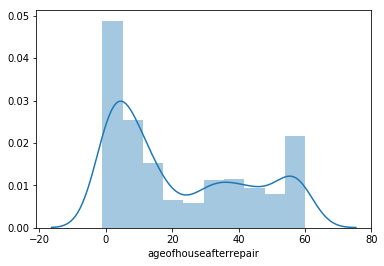

In [169]:
# ageofhouseafterrepair: derived from yearsold and modificationyearofhouse
sns.distplot(dataset['ageofhouseafterrepair'])
plt.show()

In [170]:
# MasVnrArea: Masonry veneer area in square feet
sns.distplot(dataset['MasVnrArea'])
plt.show()

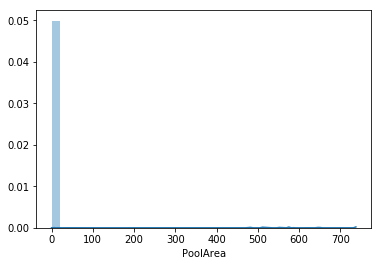

In [171]:
# PoolArea: Pool area in square feet
sns.distplot(dataset['PoolArea'])
plt.show()

### Data Exploration


In [172]:
# all numeric (float and int) variables in the dataset
dataset_numeric = dataset.select_dtypes(include=['float64', 'int64'])
dataset_numeric.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0   1          60     8450            7            5       196.0         706   
1   2          20     9600            6            8         0.0         978   
2   3          60    11250            7            5       162.0         486   
3   4          70     9550            7            5         0.0         216   
4   5          60    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF          ...            EnclosedPorch  \
0           0        150          856          ...                        0   
1           0        284         1262          ...                        0   
2           0        434          920          ...                        0   
3           0        540          756          ...                      272   
4           0        490         1145          ...                        0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  ageofgarage  \
0          0            0         0        0       2     208500            5   
1          0            0         0        0       5     181500           31   
2          0            0         0        0       9     223500            7   
3          0            0         0        0       2     140000            8   
4          0            0         0        0      12     250000            8   

   ageofhouse  ageofhouseafterrepair  
0           5                      5  
1          31                     31  
2           7                      6  
3          91                     36  
4           8                      8  

[5 rows x 36 columns]

Here, although the variables ```'MSSubClass', 'OverallQual', 'OverallCond','MoSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','LowQualFinSF'``` are numeric (int or float), we'd rather treat it as categorical as given in data dictionary. Also, we do not want 'Id'





In [173]:
# dropping 'MSSubClass', 'OverallQual', 'OverallCond','MoSold','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','LowQualFinSF','Id'
dataset_numeric = dataset_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond','MoSold','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','LowQualFinSF','Id'], axis=1)
dataset_numeric.head()


LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     8450       196.0         706           0        150          856   
1     9600         0.0         978           0        284         1262   
2    11250       162.0         486           0        434          920   
3     9550         0.0         216           0        540          756   
4    14260       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath          ...            \
0       856       854       1710             1          ...             
1      1262         0       1262             0          ...             
2       920       866       1786             1          ...             
3       961       756       1717             1          ...             
4      1145      1053       2198             1          ...             

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   SalePrice  ageofgarage  ageofhouse  ageofhouseafterrepair  
0     208500            5           5                      5  
1     181500           31          31                     31  
2     223500            7           7                      6  
3     140000            8          91                     36  
4     250000            8           8                      8  

[5 rows x 25 columns]

Let's now make a pairwise scatter plot and observe linear relationships.

<Figure size 1440x720 with 0 Axes>

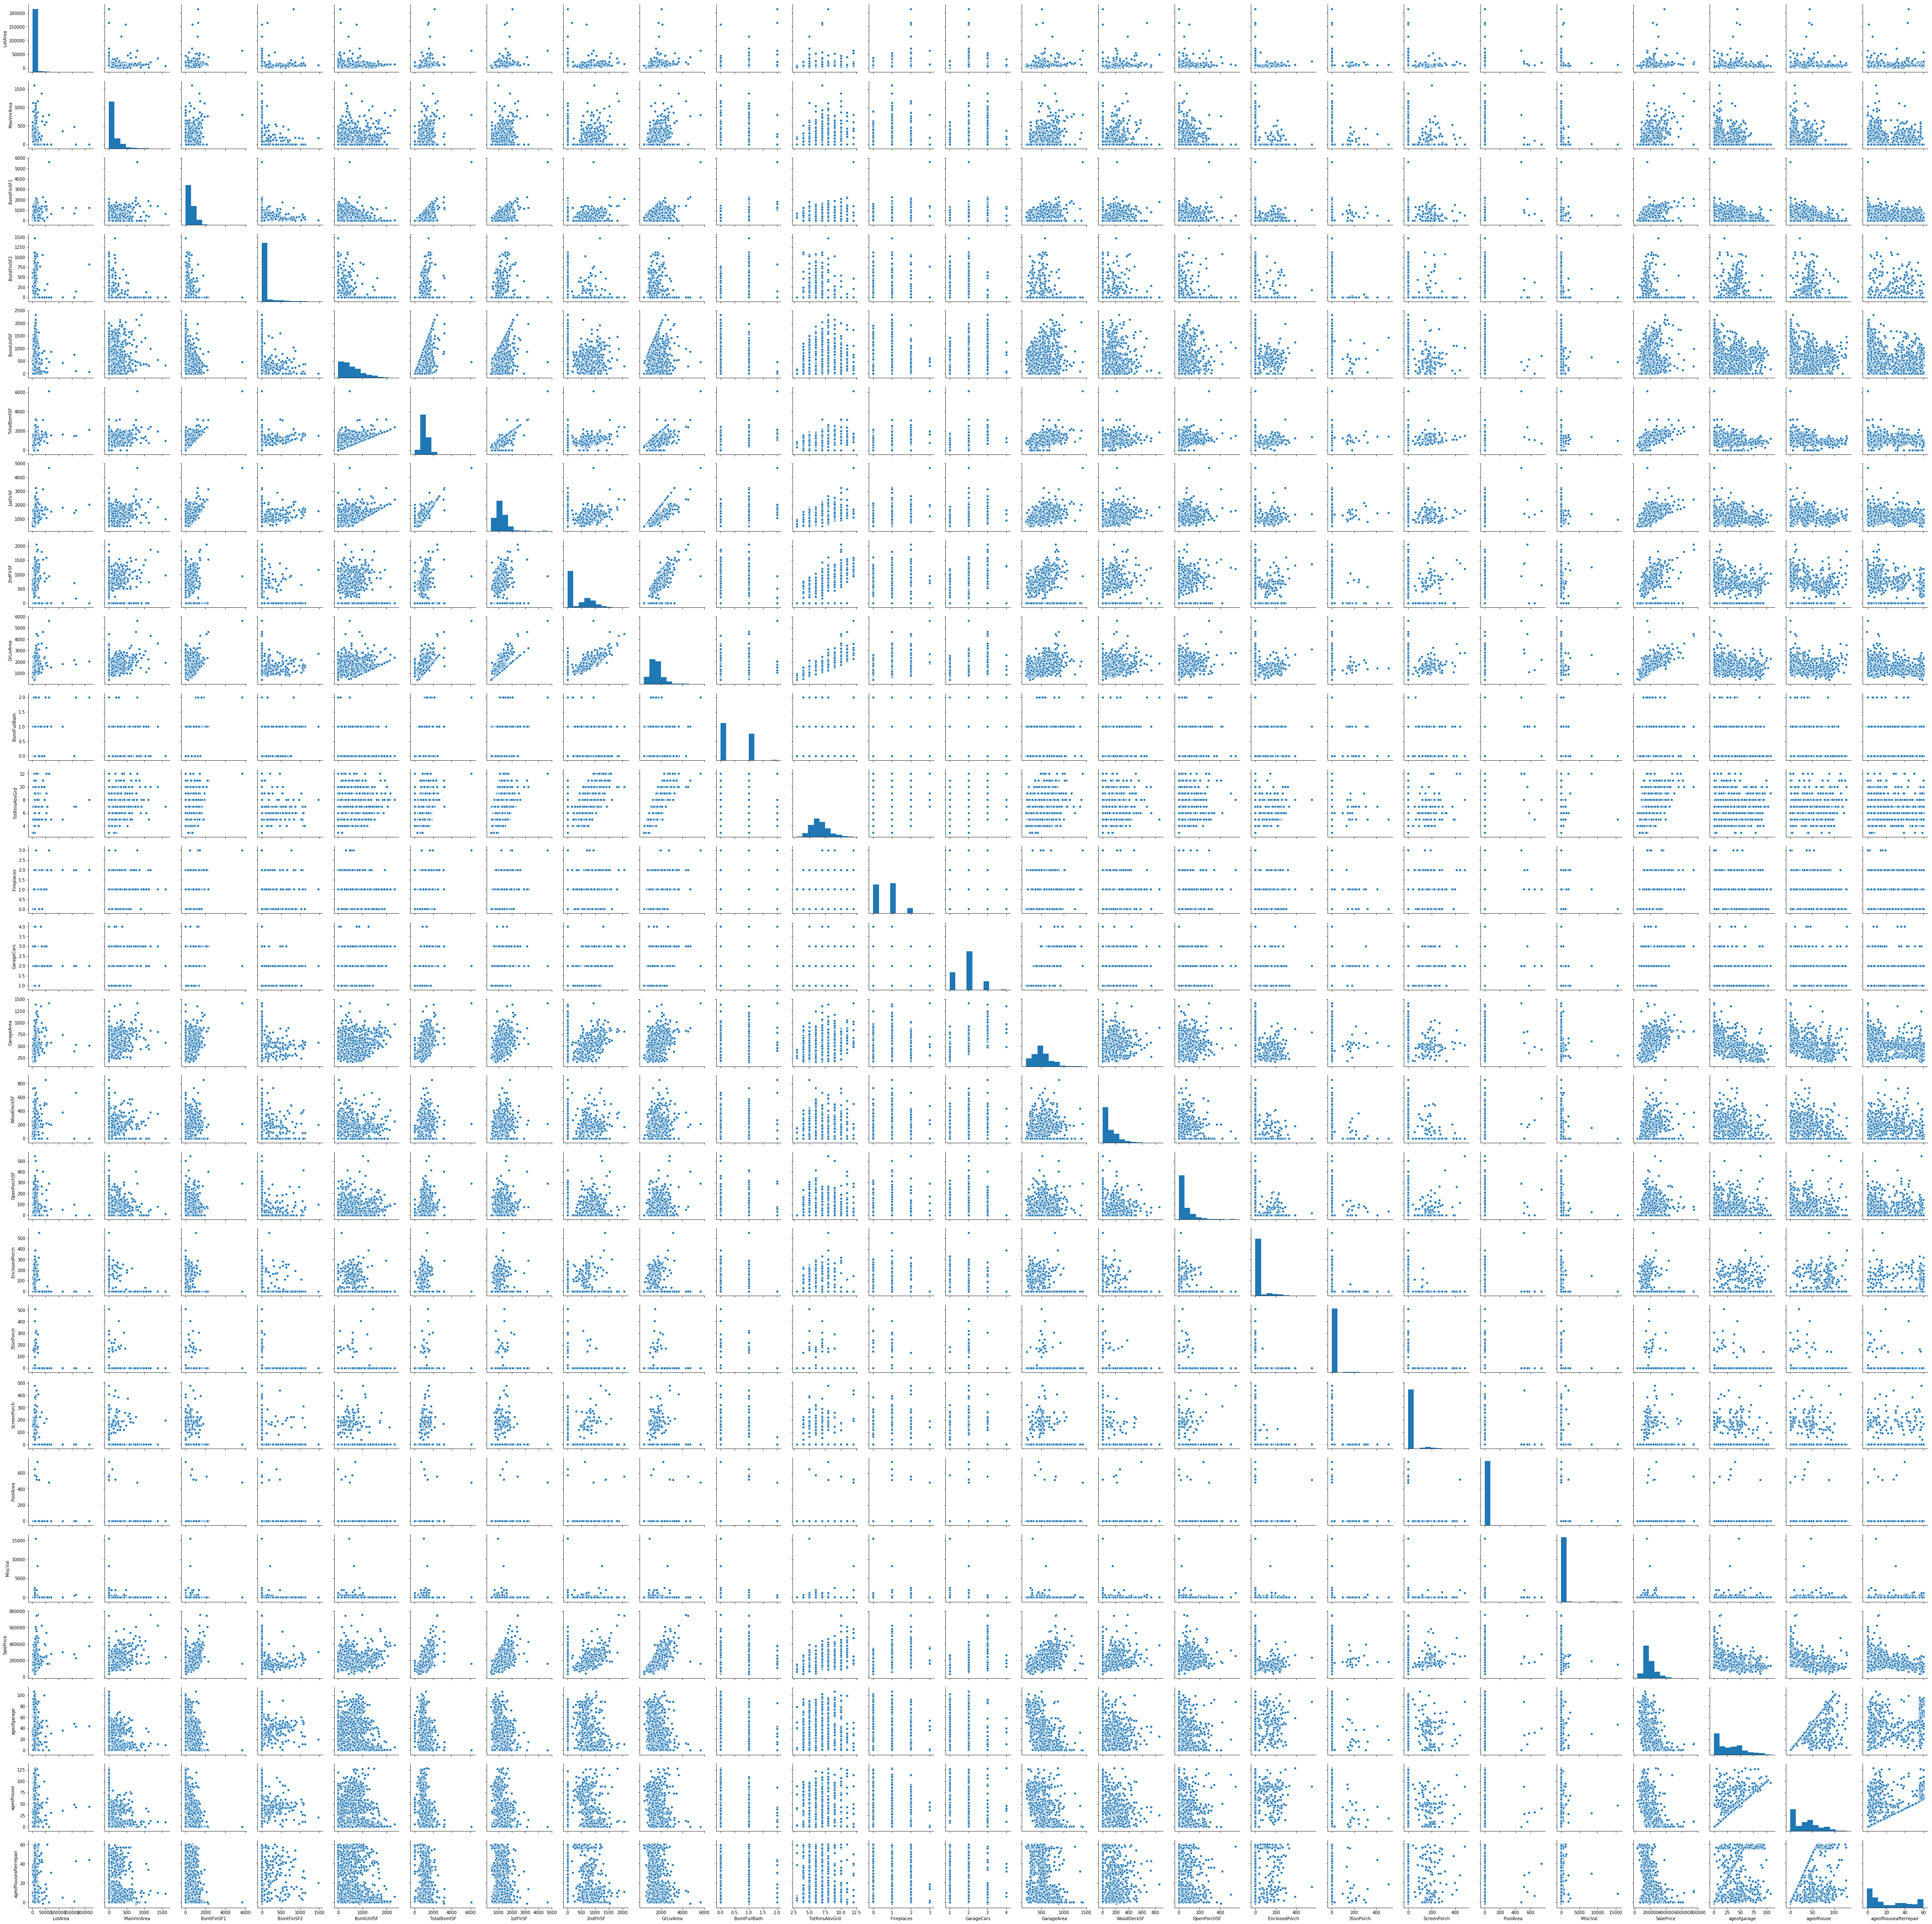

In [174]:
# # paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(dataset_numeric)
plt.show()

In [175]:
# correlation matrix
cor = dataset_numeric.corr()
cor

LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotArea                1.000000    0.096287    0.209134    0.110495   
MasVnrArea             0.096287    1.000000    0.257041   -0.078309   
BsmtFinSF1             0.209134    0.257041    1.000000   -0.054371   
BsmtFinSF2             0.110495   -0.078309   -0.054371    1.000000   
BsmtUnfSF             -0.011411    0.113705   -0.504356   -0.215117   
TotalBsmtSF            0.250562    0.357156    0.519022    0.101798   
1stFlrSF               0.287870    0.336612    0.443545    0.095537   
2ndFlrSF               0.048299    0.174101   -0.141121   -0.106885   
GrLivArea              0.255214    0.392269    0.205781   -0.018991   
BsmtFullBath           0.160638    0.084947    0.645230    0.160881   
TotRmsAbvGrd           0.183614    0.286751    0.044434   -0.041136   
Fireplaces             0.263352    0.235708    0.251658    0.039543   
GarageCars             0.137891    0.363691    0.200271   -0.074640   
GarageArea             0.168110    0.368737    0.287389   -0.046937   
WoodDeckSF             0.168086    0.150905    0.195878    0.062967   
OpenPorchSF            0.086727    0.129953    0.115770    0.006021   
EnclosedPorch         -0.018401   -0.105202   -0.100533    0.045598   
3SsnPorch              0.018578    0.015478    0.024378   -0.031683   
ScreenPorch            0.038919    0.054039    0.057334    0.086843   
PoolArea               0.077075    0.009768    0.142512    0.041346   
MiscVal                0.040437   -0.029603    0.007135    0.005890   
SalePrice              0.253784    0.468055    0.373057   -0.022302   
ageofgarage            0.023347   -0.253208   -0.151854    0.088157   
ageofhouse             0.003733   -0.303181   -0.229211    0.066566   
ageofhouseafterrepair -0.005105   -0.175262   -0.113438    0.078691   

                       BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
LotArea                -0.011411     0.250562  0.287870  0.048299   0.255214   
MasVnrArea              0.113705     0.357156  0.336612  0.174101   0.392269   
BsmtFinSF1             -0.504356     0.519022  0.443545 -0.141121   0.205781   
BsmtFinSF2             -0.215117     0.101798  0.095537 -0.106885  -0.018991   
BsmtUnfSF               1.000000     0.406613  0.311393 -0.004547   0.227093   
TotalBsmtSF             0.406613     1.000000  0.821018 -0.193793   0.441183   
1stFlrSF                0.311393     0.821018  1.000000 -0.219831   0.554416   
2ndFlrSF               -0.004547    -0.193793 -0.219831  1.000000   0.686484   
GrLivArea               0.227093     0.441183  0.554416  0.686484   1.000000   
BsmtFullBath           -0.425029     0.307496  0.249285 -0.174397   0.035235   
TotRmsAbvGrd            0.233091     0.268893  0.397567  0.613508   0.821019   
Fireplaces              0.048605     0.329710  0.401936  0.192355   0.461174   
GarageCars              0.244854     0.432426  0.440366  0.187603   0.484088   
GarageArea              0.201825     0.490845  0.496512  0.130046   0.479544   
WoodDeckSF             -0.004146     0.226014  0.229345  0.088615   0.244557   
OpenPorchSF             0.133009     0.259877  0.223599  0.206926   0.342553   
EnclosedPorch           0.000192    -0.088490 -0.059332  0.067425   0.016886   
3SsnPorch               0.020392     0.034490  0.053928 -0.026685   0.017405   
ScreenPorch            -0.015159     0.077825  0.082368  0.037785   0.096573   
PoolArea               -0.036614     0.128494  0.133748  0.082565   0.175309   
MiscVal                -0.019101    -0.009727 -0.015147  0.012352  -0.000810   
SalePrice               0.214420     0.603284  0.596087  0.317014   0.709783   
ageofgarage            -0.194084    -0.324531 -0.236353 -0.072029  -0.233594   
ageofhouse             -0.160602    -0.380083 -0.262283 -0.017478  -0.197110   
ageofhouseafterrepair  -0.193041    -0.286567 -0.239352 -0.130257  -0.282985   

                       BsmtFullBath          ...            OpenPorchSF  \
LotArea              

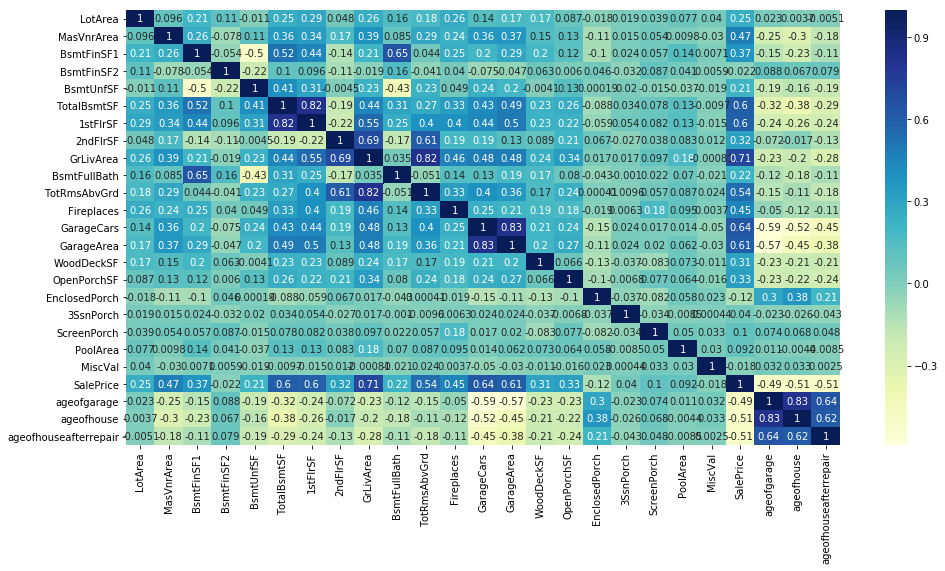

In [176]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of Saleprice with independent variables:
- Price is highly (positively) correlated with TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea 
- Price is negatively correlated to ```EnclosedPorch,ageofhouse and ageofgarge``` (-0.12 ,-0.49 , -0.51 resp). This suggest that Houses having EnclosedPorch and older houses are cheaper.


## 2. Data Cleaning


We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except ```'MSSubClass', 'OverallQual', 'OverallCond','MoSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','LowQualFinSF'```, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also. 

In [177]:
# variable formats
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1459
Data columns (total 77 columns):
Id                       1370 non-null int64
MSSubClass               1370 non-null int64
MSZoning                 1370 non-null object
LotFrontage              1370 non-null object
LotArea                  1370 non-null int64
Street                   1370 non-null object
LotShape                 1370 non-null object
LandContour              1370 non-null object
Utilities                1370 non-null object
LotConfig                1370 non-null object
LandSlope                1370 non-null object
Neighborhood             1370 non-null object
Condition1               1370 non-null object
Condition2               1370 non-null object
BldgType                 1370 non-null object
HouseStyle               1370 non-null object
OverallQual              1370 non-null int64
OverallCond              1370 non-null int64
RoofStyle                1370 non-null object
RoofMatl                

In [178]:
# converting 'MSSubClass', 'OverallQual', 'OverallCond','YearBuilt','YearRemodAdd','MoSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','LowQualFinSF'to categorical
dataset[['MSSubClass', 'OverallQual', 'OverallCond','MoSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','LowQualFinSF']] = dataset[['MSSubClass', 'OverallQual', 'OverallCond','MoSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','LowQualFinSF']].astype('object')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1459
Data columns (total 77 columns):
Id                       1370 non-null int64
MSSubClass               1370 non-null object
MSZoning                 1370 non-null object
LotFrontage              1370 non-null object
LotArea                  1370 non-null int64
Street                   1370 non-null object
LotShape                 1370 non-null object
LandContour              1370 non-null object
Utilities                1370 non-null object
LotConfig                1370 non-null object
LandSlope                1370 non-null object
Neighborhood             1370 non-null object
Condition1               1370 non-null object
Condition2               1370 non-null object
BldgType                 1370 non-null object
HouseStyle               1370 non-null object
OverallQual              1370 non-null object
OverallCond              1370 non-null object
RoofStyle                1370 non-null object
RoofMatl             

In [179]:
# dropping the Id column as we don't need it in our analysis
dataset=dataset.drop('Id',axis=1)
dataset.head()

MSSubClass MSZoning LotFrontage  LotArea Street LotShape LandContour  \
0         60       RL          65     8450   Pave      Reg         Lvl   
1         20       RL          80     9600   Pave      Reg         Lvl   
2         60       RL          68    11250   Pave      IR1         Lvl   
3         70       RL          60     9550   Pave      IR1         Lvl   
4         60       RL          84    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope          ...          PoolArea       Fence  \
0    AllPub    Inside       Gtl          ...                 0  notpresent   
1    AllPub       FR2       Gtl          ...                 0  notpresent   
2    AllPub    Inside       Gtl          ...                 0  notpresent   
3    AllPub    Corner       Gtl          ...                 0  notpresent   
4    AllPub       FR2       Gtl          ...                 0  notpresent   

  MiscVal MoSold SaleType SaleCondition SalePrice ageofgarage ageofhouse  \
0       0      2       WD        Normal    208500           5          5   
1       0      5       WD        Normal    181500          31         31   
2       0      9       WD        Normal    223500           7          7   
3       0      2       WD       Abnorml    140000           8         91   
4       0     12       WD        Normal    250000           8          8   

  ageofhouseafterrepair  
0                     5  
1                    31  
2                     6  
3                    36  
4                     8  

[5 rows x 76 columns]

In [180]:
# checking for outliers
dataset.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,0.95,0.98])

LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count    1370.000000  1370.000000  1370.000000  1370.000000  1370.000000   
mean    10687.435036   109.076642   454.211679    48.418248   570.742336   
std     10228.507006   184.589326   458.985739   164.817484   444.050989   
min      1300.000000     0.000000     0.000000     0.000000     0.000000   
25%      7731.000000     0.000000     0.000000     0.000000   225.500000   
50%      9591.000000     0.000000   399.500000     0.000000   477.500000   
75%     11712.750000   171.750000   728.000000     0.000000   811.000000   
85%     13348.600000   272.000000   936.000000     0.000000  1033.950000   
90%     14573.300000   340.000000  1074.400000   127.100000  1237.300000   
95%     17501.650000   461.750000  1275.650000   406.050000  1475.500000   
98%     25318.860000   657.340000  1446.240000   669.240000  1676.200000   
max    215245.000000  1600.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  TotRmsAbvGrd  \
count  1370.000000  1370.000000  1370.000000  1370.000000   1370.000000   
mean   1073.372263  1176.086131   353.202190  1533.450365      6.551825   
std     435.558797   385.381717   439.497524   519.489200      1.590884   
min       0.000000   438.000000     0.000000   438.000000      3.000000   
25%     808.500000   894.000000     0.000000  1152.000000      5.000000   
50%    1008.000000  1098.000000     0.000000  1479.000000      6.000000   
75%    1314.000000  1414.000000   737.000000  1788.000000      7.000000   
85%    1494.000000  1580.000000   871.000000  2001.300000      8.000000   
90%    1614.200000  1686.100000   975.000000  2169.300000      9.000000   
95%    1753.000000  1837.100000  1146.950000  2470.750000     10.000000   
98%    2001.240000  2071.480000  1320.000000  2780.580000     10.620000   
max    6110.000000  4692.000000  2065.000000  5642.000000     12.000000   

               ...            OpenPorchSF  EnclosedPorch    3SsnPorch  \
count          ...            1370.000000    1370.000000  1370.000000   
mean           ...              47.028467      21.031387     3.633577   
std            ...              64.995049      60.519492    30.252215   
min            ...               0.000000       0.000000     0.000000   
25%            ...               0.000000       0.000000     0.000000   
50%            ...              27.000000       0.000000     0.000000   
75%            ...              69.000000       0.000000     0.000000   
85%            ...             104.650000       0.000000     0.000000   
90%            ...             130.000000     108.000000     0.000000   
95%            ...             171.100000     180.000000     0.000000   
98%            ...             240.620000     236.000000     0.000000   
max            ...             547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal      SalePrice  ageofgarage  \
count  1370.000000  1370.000000   1370.000000    1370.000000  1370.000000   
mean     16.050365     2.940146     43.170803  185194.797080    29.458394   
std      57.422820    41.470515    503.247977   78899.705642    24.723956   
min       0.000000     0.000000      0.000000   35311.000000     0.000000   
25%       0.000000     0.000000      0.000000  133925.000000     6.250000   
50%       0.000000     0.000000      0.000000  167000.000000    28.000000   
75%       0.000000     0.000000      0.000000  217875.000000    47.000000   
85%       0.000000     0.000000      0.000000  255325.000000    55.000000   
90%       0.000000     0.000000      0.000000  281383.900000    64.000000   
95%     166.650000     0.000000      0.000000  334175.600000    79.000000   
98%     224.000000     0.000000    500.000000  395119.040000    88.000000   
max     480.000000   738.000000  15500.000000  755000.000000   107.000000   

        ageofhouse  ageofhouseafterrepair  
count  1370.000000            1370.000000  
mean    

In [181]:
#removing the outliers for LotArea as we can see the difference is very huge
lotAreaQuantile=dataset['LotArea'].quantile(0.98)

In [182]:
dataset = dataset.loc[dataset['LotArea']<=lotAreaQuantile]

In [183]:
# checking for outliers again
dataset.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,0.95,0.98])

LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   1342.000000  1342.000000  1342.000000  1342.000000  1342.000000   
mean    9700.988823   106.523845   441.108793    46.826379   574.849478   
std     3703.289431   179.117554   430.218329   161.259585   445.646988   
min     1300.000000     0.000000     0.000000     0.000000     0.000000   
25%     7646.000000     0.000000     0.000000     0.000000   230.000000   
50%     9528.000000     0.000000   389.000000     0.000000   483.500000   
75%    11509.000000   170.000000   712.750000     0.000000   812.500000   
85%    12963.200000   268.000000   918.550000     0.000000  1047.550000   
90%    14049.200000   336.000000  1055.700000   118.800000  1248.100000   
95%    16152.100000   451.950000  1260.950000   395.750000  1481.900000   
98%    19310.760000   650.180000  1441.360000   647.880000  1681.080000   
max    25286.000000  1600.000000  2188.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  TotRmsAbvGrd  \
count  1342.000000  1342.000000  1342.000000  1342.000000   1342.000000   
mean   1062.784650  1165.354694   350.210134  1519.521610      6.531297   
std     409.066808   368.148093   434.856249   494.402031      1.573500   
min       0.000000   438.000000     0.000000   438.000000      3.000000   
25%     806.000000   894.000000     0.000000  1144.250000      5.000000   
50%    1001.500000  1094.000000     0.000000  1472.500000      6.000000   
75%    1302.000000  1391.750000   729.000000  1776.000000      7.000000   
85%    1484.850000  1567.000000   866.000000  1982.850000      8.000000   
90%    1601.800000  1678.600000   952.700000  2155.700000      9.000000   
95%    1741.600000  1825.250000  1140.000000  2451.900000      9.950000   
98%    1987.080000  2055.880000  1304.360000  2717.160000     10.000000   
max    3206.000000  3228.000000  2065.000000  4476.000000     12.000000   

               ...            OpenPorchSF  EnclosedPorch    3SsnPorch  \
count          ...            1342.000000    1342.000000  1342.000000   
mean           ...              46.318927      20.938152     3.709389   
std            ...              63.767752      59.277277    30.561812   
min            ...               0.000000       0.000000     0.000000   
25%            ...               0.000000       0.000000     0.000000   
50%            ...              27.000000       0.000000     0.000000   
75%            ...              68.000000       0.000000     0.000000   
85%            ...             104.000000       0.000000     0.000000   
90%            ...             128.900000     108.000000     0.000000   
95%            ...             168.950000     180.000000     0.000000   
98%            ...             238.360000     236.000000     0.000000   
max            ...             547.000000     386.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal      SalePrice  ageofgarage  \
count  1342.000000  1342.000000   1342.000000    1342.000000  1342.000000   
mean     15.734724     2.262295     43.177347  183608.101341    29.324143   
std      56.891065    37.311212    507.969557   77182.689544    24.725367   
min       0.000000     0.000000      0.000000   35311.000000     0.000000   
25%       0.000000     0.000000      0.000000  133000.000000     6.000000   
50%       0.000000     0.000000      0.000000  165450.000000    28.000000   
75%       0.000000     0.000000      0.000000  215000.000000    47.000000   
85%       0.000000     0.000000      0.000000  252951.700000    55.000000   
90%       0.000000     0.000000      0.000000  279950.000000    64.000000   
95%     160.950000     0.000000      0.000000  325607.800000    79.000000   
98%     224.000000     0.000000    500.000000  394465.300000    87.180000   
max     480.000000   738.000000  15500.000000  755000.000000   107.000000   

        ageofhouse  ageofhouseafterrepair  
count  1342.000000            1342.000000  
mean     34.919523  

In [184]:
# again we remove the outliers for PoolArea now
PoolAreaQuantile=dataset['PoolArea'].quantile(0.98)

In [185]:
dataset = dataset.loc[dataset['PoolArea']<=PoolAreaQuantile]

In [186]:
# checking for outliers again
dataset.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,0.95,0.98])

LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   1337.000000  1337.000000  1337.000000  1337.000000  1337.000000   
mean    9683.397158   106.710546   439.713538    46.368736   575.724757   
std     3691.569080   179.368668   428.310814   160.878337   445.962500   
min     1300.000000     0.000000     0.000000     0.000000     0.000000   
25%     7630.000000     0.000000     0.000000     0.000000   230.000000   
50%     9520.000000     0.000000   387.000000     0.000000   484.000000   
75%    11500.000000   170.000000   712.000000     0.000000   814.000000   
85%    12922.600000   269.200000   917.800000     0.000000  1049.200000   
90%    14000.000000   336.000000  1054.200000   117.000000  1250.200000   
95%    16056.600000   452.800000  1260.200000   392.000000  1483.400000   
98%    19182.240000   650.280000  1437.400000   649.480000  1681.680000   
max    25286.000000  1600.000000  2188.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  TotRmsAbvGrd  \
count  1337.000000  1337.000000  1337.000000  1337.000000   1337.000000   
mean   1061.807031  1163.875093   348.465969  1516.312640      6.525056   
std     407.980427   367.008831   431.915202   486.926199      1.565298   
min       0.000000   438.000000     0.000000   438.000000      3.000000   
25%     806.000000   893.000000     0.000000  1144.000000      5.000000   
50%     999.000000  1092.000000     0.000000  1472.000000      6.000000   
75%    1302.000000  1391.000000   729.000000  1775.000000      7.000000   
85%    1484.600000  1566.600000   865.200000  1980.600000      8.000000   
90%    1600.800000  1676.600000   941.000000  2144.800000      8.400000   
95%    1735.600000  1814.000000  1135.200000  2447.600000      9.000000   
98%    1981.680000  2047.960000  1290.240000  2706.520000     10.000000   
max    3206.000000  3228.000000  1872.000000  4316.000000     12.000000   

               ...            OpenPorchSF  EnclosedPorch    3SsnPorch  \
count          ...            1337.000000    1337.000000  1337.000000   
mean           ...              46.173523      21.016455     3.723261   
std            ...              63.619187      59.374230    30.618104   
min            ...               0.000000       0.000000     0.000000   
25%            ...               0.000000       0.000000     0.000000   
50%            ...              27.000000       0.000000     0.000000   
75%            ...              68.000000       0.000000     0.000000   
85%            ...             104.000000       0.000000     0.000000   
90%            ...             128.400000     109.600000     0.000000   
95%            ...             168.200000     180.600000     0.000000   
98%            ...             238.560000     236.000000     0.000000   
max            ...             547.000000     386.000000   508.000000   

       ScreenPorch  PoolArea       MiscVal      SalePrice  ageofgarage  \
count  1337.000000    1337.0   1337.000000    1337.000000  1337.000000   
mean     15.464473       0.0     41.842932  183081.602094    29.327599   
std      55.795704       0.0    506.088200   75720.637555    24.764618   
min       0.000000       0.0      0.000000   35311.000000     0.000000   
25%       0.000000       0.0      0.000000  133000.000000     6.000000   
50%       0.000000       0.0      0.000000  165000.000000    28.000000   
75%       0.000000       0.0      0.000000  215000.000000    47.000000   
85%       0.000000       0.0      0.000000  252406.800000    55.000000   
90%       0.000000       0.0      0.000000  279700.000000    64.400000   
95%     160.200000       0.0      0.000000  325364.800000    79.000000   
98%     222.560000       0.0    500.000000  393040.960000    87.280000   
max     480.000000       0.0  15500.000000  755000.000000   107.000000   

        ageofhouse  ageofhouseafterrepair  
count  1337.000000            1337.000000  
mean     34.943904              22.486163  
std      29.532

In [190]:
# again removing outliers for MiscVal as we see the difference clearly
MiscValQuantile=dataset['MiscVal'].quantile(0.98)

In [191]:
dataset = dataset.loc[dataset['MiscVal']<=MiscValQuantile]

In [192]:
# checking for outliers again
dataset.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,0.95,0.98])

LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   1291.000000  1291.000000  1291.000000  1291.000000  1291.000000   
mean    9653.090627   108.663052   440.629744    47.068164   580.171960   
std     3721.013042   181.000228   431.183625   163.140920   449.568813   
min     1300.000000     0.000000     0.000000     0.000000     0.000000   
25%     7586.500000     0.000000     0.000000     0.000000   235.500000   
50%     9480.000000     0.000000   385.000000     0.000000   485.000000   
75%    11500.000000   172.000000   719.000000     0.000000   817.000000   
85%    12952.000000   272.000000   923.500000     0.000000  1064.500000   
90%    14000.000000   338.000000  1059.000000   117.000000  1264.000000   
95%    16057.500000   456.000000  1265.500000   405.500000  1491.500000   
98%    19312.400000   651.400000  1441.400000   662.400000  1686.600000   
max    25286.000000  1600.000000  2188.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  TotRmsAbvGrd  \
count  1291.000000  1291.000000  1291.000000  1291.000000   1291.000000   
mean   1067.869868  1167.947328   349.942680  1521.603408      6.535244   
std     409.392797   369.852619   432.347814   487.015067      1.569858   
min       0.000000   438.000000     0.000000   438.000000      3.000000   
25%     810.000000   894.000000     0.000000  1152.000000      5.000000   
50%    1005.000000  1095.000000     0.000000  1479.000000      6.000000   
75%    1310.500000  1398.000000   729.000000  1779.000000      7.000000   
85%    1489.500000  1571.500000   866.000000  1984.500000      8.000000   
90%    1606.000000  1682.000000   941.000000  2153.000000      9.000000   
95%    1749.000000  1832.000000  1131.500000  2448.500000      9.500000   
98%    1987.200000  2056.200000  1297.600000  2705.800000     10.000000   
max    3206.000000  3228.000000  1872.000000  4316.000000     12.000000   

               ...            OpenPorchSF  EnclosedPorch    3SsnPorch  \
count          ...            1291.000000    1291.000000  1291.000000   
mean           ...              46.125484      20.409760     3.608056   
std            ...              62.158872      58.660713    29.880715   
min            ...               0.000000       0.000000     0.000000   
25%            ...               0.000000       0.000000     0.000000   
50%            ...              27.000000       0.000000     0.000000   
75%            ...              68.000000       0.000000     0.000000   
85%            ...             104.000000       0.000000     0.000000   
90%            ...             129.000000     102.000000     0.000000   
95%            ...             168.000000     176.500000     0.000000   
98%            ...             235.600000     236.000000     0.000000   
max            ...             502.000000     386.000000   508.000000   

       ScreenPorch  PoolArea  MiscVal      SalePrice  ageofgarage  \
count  1291.000000    1291.0   1291.0    1291.000000  1291.000000   
mean     15.197521       0.0      0.0  184243.113091    29.090627   
std      54.451334       0.0      0.0   76295.892616    24.847884   
min       0.000000       0.0      0.0   35311.000000     0.000000   
25%       0.000000       0.0      0.0  133800.000000     6.000000   
50%       0.000000       0.0      0.0  167000.000000    27.000000   
75%       0.000000       0.0      0.0  216918.500000    47.000000   
85%       0.000000       0.0      0.0  254450.000000    55.000000   
90%       0.000000       0.0      0.0  281213.000000    65.000000   
95%     160.000000       0.0      0.0  327000.000000    79.000000   
98%     220.400000       0.0      0.0  394469.000000    87.000000   
max     410.000000       0.0      0.0  755000.000000   107.000000   

        ageofhouse  ageofhouseafterrepair  
count  1291.000000            1291.000000  
mean     34.458559              22.175833  
std      29.564757              20.515887  
min       0.000000               0.0

Now we can see that , outliers have been removed and we can proceed with this data now

## 3. Data Preparation 


In [223]:
# split into X and y
X = dataset.loc[:,['MSSubClass','MSZoning','LotFrontage','LotArea','Street','LotShape',
                'LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
                'Condition2','BldgType','HouseStyle','OverallQual','OverallCond',
                'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                'MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
                'BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
                'BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical',
                '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
                'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd',
                'Functional','Fireplaces','FireplaceQu', 'GarageType','GarageFinish',
                'GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF',
                'OpenPorchSF' ,'EnclosedPorch','3SsnPorch','ScreenPorch', 'PoolArea',
                'Fence','MiscVal','MoSold','SaleType','SaleCondition'
]]

y = dataset['SalePrice']

In [225]:
# creating dummy variables for categorical variables

# subset all categorical variables
dataset_categorical = X.select_dtypes(include=['object'])
dataset_categorical.head()

MSSubClass MSZoning LotFrontage Street LotShape LandContour Utilities  \
0         60       RL          65   Pave      Reg         Lvl    AllPub   
1         20       RL          80   Pave      Reg         Lvl    AllPub   
2         60       RL          68   Pave      IR1         Lvl    AllPub   
3         70       RL          60   Pave      IR1         Lvl    AllPub   
4         60       RL          84   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood      ...      FireplaceQu GarageType  \
0    Inside       Gtl      CollgCr      ...       notpresent     Attchd   
1       FR2       Gtl      Veenker      ...               TA     Attchd   
2    Inside       Gtl      CollgCr      ...               TA     Attchd   
3    Corner       Gtl      Crawfor      ...               Gd     Detchd   
4       FR2       Gtl      NoRidge      ...               TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive       Fence MoSold SaleType  \
0          RFn         TA         TA          Y  notpresent      2       WD   
1          RFn         TA         TA          Y  notpresent      5       WD   
2          RFn         TA         TA          Y  notpresent      9       WD   
3          Unf         TA         TA          Y  notpresent      2       WD   
4          RFn         TA         TA          Y  notpresent     12       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 52 columns]

In [226]:
# convert into dummies
dataset_dummies = pd.get_dummies(dataset_categorical, drop_first=True)
dataset_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

           ...            SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0          ...                         0               0             0   
1          ...                         0               0             0   
2          ...                         0               0             0   
3          ...                         0               0             0   
4          ...                         0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 379 columns]

In [227]:
# drop categorical variables 
X = X.drop(list(dataset_categorical.columns), axis=1)

In [228]:
# concat dummy variables with X
X = pd.concat([X, dataset_dummies], axis=1)

In [229]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=399)

In [230]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 4. Model Building and Evaluation

## Ridge Regression

In [231]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [232]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.021126      0.007783         0.000799        0.000400      0.0001   
1       0.030579      0.011550         0.000400        0.000490       0.001   
2       0.027126      0.005765         0.003598        0.006213        0.01   
3       0.032043      0.005628         0.000400        0.000490        0.05   
4       0.023603      0.003924         0.001398        0.001019         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -19771.260127      -20375.402738      -21672.183696   
1   {'alpha': 0.001}      -19769.068758      -20373.514893      -21671.868894   
2    {'alpha': 0.01}      -19747.934562      -20354.820746      -21668.748398   
3    {'alpha': 0.05}      -19665.144353      -20275.656492      -21655.972987   
4     {'alpha': 0.1}      -19577.994366      -20185.027148      -21641.566997   

   split3_test_score       ...         mean_test_score  std_test_score  \
0      -23327.045098       ...           -21224.690278     1224.894249   
1      -23319.441998       ...           -21222.146098     1223.083558   
2      -23247.017304       ...           -21197.622139     1206.149524   
3      -22985.800165       ...           -21104.095627     1150.804153   
4      -22747.904129       ...           -21010.978897     1109.682998   

   rank_test_score  split0_train_score  split1_train_score  \
0               28        -9866.758652        -9397.957293   
1               27        -9866.897229        -9398.125472   
2               26        -9868.372545        -9399.890346   
3               25        -9875.565704        -9408.565686   
4               24        -9886.030317        -9419.166619   

   split2_train_score  split3_train_score  split4_train_score  \
0        -9675.618903        -9656.179353        -9213.987355   
1        -9675.616756        -9656.309022        -9213.973228   
2        -9675.596928        -9657.695446        -9213.846026   
3        -9675.578623        -9662.337343        -9213.751813   
4        -9675.728006        -9665.960399        -9214.829821   

   mean_train_score  std_train_score  
0      -9562.100311       229.207156  
1      -9562.184341       229.234642  
2      -9563.080258       229.525995  
3      -9567.159834       230.641239  
4      -9572.343033       232.004779  

[5 rows x 21 columns]

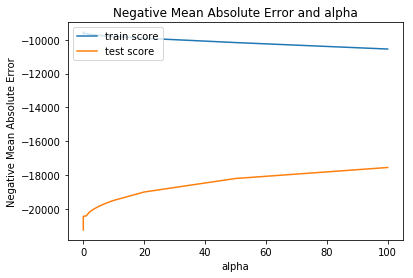

In [233]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [234]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_


array([ 3.86652549e+03,  2.76572278e+03,  6.87740914e+03,  1.86736711e+03,
       -3.78300759e+02,  7.57218494e+03,  8.40599707e+03,  5.97669359e+03,
        1.16307512e+04,  3.13356857e+03,  1.69516164e+03,  3.01314995e+03,
        4.21315098e+03,  2.45094955e+03,  1.25155385e+03, -2.17758131e+02,
       -4.02054500e+02,  1.33926079e+03,  0.00000000e+00,  0.00000000e+00,
       -1.76378311e+02,  8.11280820e+02,  2.47548880e+02, -8.78262268e+02,
        2.32277409e+03,  5.91693734e+02,  6.65488117e+02, -1.22519530e+03,
       -8.24492802e+02, -1.14804805e+03, -1.35462826e+03, -1.23387724e+03,
       -3.22884732e+02, -1.29087342e+03,  3.03354809e+03,  5.48582551e+02,
        1.85789953e+03, -6.29003970e+02, -3.14176999e+02,  4.51629663e+02,
        7.30618882e+02,  4.64401929e+02,  1.26052675e+02, -9.37800447e+02,
        8.55014992e+02,  3.43771209e-27, -1.06839506e+03, -9.00576138e+02,
       -1.55549666e+03,  6.33609328e+02,  1.61219008e+02, -9.65474743e+02,
       -7.72666816e+02,  

In [235]:
# predict prices of X_test
y_pred_test = lasso.predict(X_test)
y_pred_train=ridge.predict(X_train)

In [236]:
# evaluate the model on test set
from sklearn.metrics import r2_score
r_square = r2_score(y_test, y_pred_test)
print("R Square Value : {}".format(r_square))

R Square Value : 0.9040405421435523


In [237]:
# evaluate the model on train set
from sklearn.metrics import r2_score
r_square = r2_score(y_train, y_pred_train)
print("R Square Value : {}".format(r_square))

R Square Value : 0.9562769648306367


## Lasso

In [238]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   39.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [239]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.344602      0.030197         0.000400        0.000489      0.0001   
1       0.315879      0.026064         0.000400        0.000490       0.001   
2       0.299357      0.021392         0.000600        0.000490        0.01   
3       0.303373      0.012733         0.000600        0.000490        0.05   
4       0.306643      0.020675         0.000798        0.000399         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -20030.557078      -19964.343636      -21599.345656   
1   {'alpha': 0.001}      -20029.848339      -19964.420621      -21599.322407   
2    {'alpha': 0.01}      -20022.760374      -19965.033701      -21599.087024   
3    {'alpha': 0.05}      -19991.253155      -19968.469632      -21597.987120   
4     {'alpha': 0.1}      -19951.890331      -19973.208725      -21596.584531   

   split3_test_score       ...         mean_test_score  std_test_score  \
0      -22274.938230       ...           -20948.168770      894.225284   
1      -22274.462355       ...           -20947.914360      894.212194   
2      -22269.692634       ...           -20945.335973      894.117505   
3      -22248.896667       ...           -20934.082632      893.768347   
4      -22235.844336       ...           -20922.693818      897.262839   

   rank_test_score  split0_train_score  split1_train_score  \
0               28        -9892.180923        -9428.301035   
1               27        -9892.184827        -9428.296984   
2               26        -9892.227397        -9428.258684   
3               25        -9892.463927        -9428.194231   
4               24        -9892.817025        -9428.224063   

   split2_train_score  split3_train_score  split4_train_score  \
0        -9678.313166        -9683.397181        -9221.554520   
1        -9678.309299        -9683.396321        -9221.561016   
2        -9678.272545        -9683.388468        -9221.629354   
3        -9678.173668        -9683.449619        -9221.995642   
4        -9678.117910        -9683.614366        -9222.536190   

   mean_train_score  std_train_score  
0      -9580.749365       232.080294  
1      -9580.749690       232.079462  
2      -9580.755290       232.070985  
3      -9580.855418       232.026745  
4      -9581.061911       231.960438  

[5 rows x 21 columns]

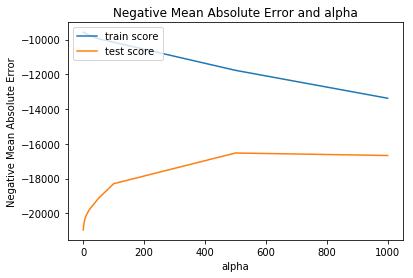

In [240]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [241]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 


Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [242]:
lasso.coef_

array([ 2.82526966e+03,  1.80674120e+03,  7.30195710e+03,  7.53583849e+02,
       -0.00000000e+00,  6.96027460e+03,  3.04950674e+03,  0.00000000e+00,
        2.42373301e+04,  5.60479309e+01,  5.22394509e+01,  3.12691827e+03,
        3.50656834e+03,  1.56685354e+03,  9.10579519e+02, -0.00000000e+00,
        0.00000000e+00,  9.80535320e+02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -5.60470499e+02,
        2.75909457e+03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -4.00848373e+02, -4.28780648e+02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  6.50045504e+02,  0.00000000e+00,
        0.00000000e+00, -2.43389702e+03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -5.83902528e+02,
        0.00000000e+00,  0.00000000e+00, -4.93988534e+02, -2.75588455e+02,
       -1.16320055e+03,  1.81066974e+02,  0.00000000e+00, -4.49382144e+02,
       -0.00000000e+00,  

In [243]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
ls=list(zip(cols, model_parameters))
ls

[('constant', 184764.722),
 ('LotArea', 2825.27),
 ('MasVnrArea', 1806.741),
 ('BsmtFinSF1', 7301.957),
 ('BsmtFinSF2', 753.584),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 6960.275),
 ('1stFlrSF', 3049.507),
 ('2ndFlrSF', 0.0),
 ('GrLivArea', 24237.33),
 ('TotRmsAbvGrd', 56.048),
 ('Fireplaces', 52.239),
 ('GarageCars', 3126.918),
 ('GarageArea', 3506.568),
 ('WoodDeckSF', 1566.854),
 ('OpenPorchSF', 910.58),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 980.535),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MSSubClass_30', -0.0),
 ('MSSubClass_40', -0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', -560.47),
 ('MSSubClass_60', 2759.095),
 ('MSSubClass_70', -0.0),
 ('MSSubClass_75', -0.0),
 ('MSSubClass_80', 0.0),
 ('MSSubClass_85', -0.0),
 ('MSSubClass_90', -400.848),
 ('MSSubClass_120', -428.781),
 ('MSSubClass_160', -0.0),
 ('MSSubClass_180', -0.0),
 ('MSSubClass_190', -0.0),
 ('MSZoning_FV', 650.046),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -2433.

In [244]:
final_fea = pd.DataFrame(ls, columns =['featureName','coeffiecient'])
 #Filtering features whose coefficients are non-zero
final_fea = final_fea.loc[final_fea['coeffiecient'] !=0 ]
final_fea.sort_values(by=['coeffiecient'],ascending = False)

featureName  coeffiecient
0                constant    184764.722
9               GrLivArea     24237.330
211         OverallQual_9     12715.694
212        OverallQual_10      8059.053
392          SaleType_New      8036.655
210         OverallQual_8      7701.393
3              BsmtFinSF1      7301.957
6             TotalBsmtSF      6960.275
330            FullBath_3      6044.854
177  Neighborhood_StoneBr      4045.315
112     LotFrontage_104.0      3720.821
280       BsmtExposure_Gd      3715.574
13             GarageArea      3506.568
349        Functional_Typ      3197.288
12             GarageCars      3126.918
7                1stFlrSF      3049.507
118     LotFrontage_110.0      2924.646
108     LotFrontage_100.0      2882.929
1                 LotArea      2825.270
25          MSSubClass_60      2759.095
268      Foundation_PConc      2577.058
217         OverallCond_7      2563.020
209         OverallQual_7      2549.054
285      BsmtFinType1_GLQ      2427.529
181       Condition1_Norm      2400.412
170  Neighborhood_NoRidge      2388.836
398  SaleCondition_Normal      2343.835
231   Exterior1st_BrkFace      2118.430
171  Neighborhood_NridgHt      2107.541
260      MasVnrType_Stone      2009.086
..                    ...           ...
147       LandContour_Low      -649.230
302          HeatingQC_Gd      -719.734
376              MoSold_2      -795.895
98       LotFrontage_90.0      -840.972
337        BedroomAbvGr_5      -918.867
127     LotFrontage_122.0      -985.855
172  Neighborhood_OldTown      -997.777
137     LotFrontage_152.0     -1088.917
312      LowQualFinSF_120     -1091.893
49       LotFrontage_41.0     -1163.201
93       LotFrontage_85.0     -1181.990
348        Functional_Sev     -1239.601
200     HouseStyle_2.5Fin     -1345.226
206         OverallQual_4     -1639.050
282       BsmtExposure_No     -1704.841
119     LotFrontage_111.0     -1751.080
167    Neighborhood_NAmes     -1778.791
304          HeatingQC_TA     -1863.660
215         OverallCond_5     -1865.025
155         LandSlope_Sev     -1899.705
162  Neighborhood_Edwards     -2030.878
213         OverallCond_3     -2042.456
273           BsmtQual_Gd     -2267.683
38            MSZoning_RM     -2433.897
214         OverallCond_4     -2796.301
263          ExterQual_TA     -2956.006
342        KitchenQual_Gd     -3131.898
274           BsmtQual_TA     -3158.135
343        KitchenQual_TA     -3834.974
339        KitchenAbvGr_2     -4354.688

[170 rows x 2 columns]

## So from this lasso regression , we get this list of features which plays a significant role in predicting the price of the house

In [245]:
# predict prices of X_test
y_pred_test = lasso.predict(X_test)
y_pred_train=lasso.predict(X_train)

In [246]:
# evaluate the model on test set
from sklearn.metrics import r2_score
r_square = r2_score(y_test, y_pred_test)
print("R Square Value : {}".format(r_square))

R Square Value : 0.9040405421435523


In [247]:
# evaluate the model on train set
from sklearn.metrics import r2_score
r_square = r2_score(y_train, y_pred_train)
print("R Square Value : {}".format(r_square))

R Square Value : 0.9455076720688377
